In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Travel_Destination_Preferences.csv')

In [3]:
data.head()

,Preferred_Destination,Average_Travel_Budget,Frequency_of_Travel,Accommodation_Preference
0,Mountains,1360,2,Budget
1,City,4272,12,Luxury
2,City,3592,12,Luxury
3,Beach,966,7,Budget
4,Beach,4926,12,Luxury


we can see that the data of travellars of their destination preferences and their average budgeets and the annual travel trips frequency and their accomodation types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Preferred_Destination     3000 non-null   object
 1   Average_Travel_Budget     3000 non-null   int64 
 2   Frequency_of_Travel       3000 non-null   int64 
 3   Accommodation_Preference  3000 non-null   object
dtypes: int64(2), object(2)
memory usage: 93.9+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Average_Travel_Budget,3000.0,2775.170333,1280.410764,501.0,1659.75,2775.5,3874.5,4999.0
Frequency_of_Travel,3000.0,6.553000,3.434403,1.0,4.00,7.0,10.0,12.0


we can see that basic statistics of the numaric columns

In [6]:
#checking for null values
data.isnull().sum()

,0
Preferred_Destination,0
Average_Travel_Budget,0
Frequency_of_Travel,0
Accommodation_Preference,0


yhere are no any null values sitting in our data

In [7]:
# checkig for duplicate values
data.duplicated().sum()

34

yes there are some duplicate values are there in our dataset. let us remove them

In [8]:
#removal of duplicated records
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(2966, 4)

In [10]:
data.columns

Index(['Preferred_Destination', 'Average_Travel_Budget', 'Frequency_of_Travel',
       'Accommodation_Preference'],
      dtype='object')

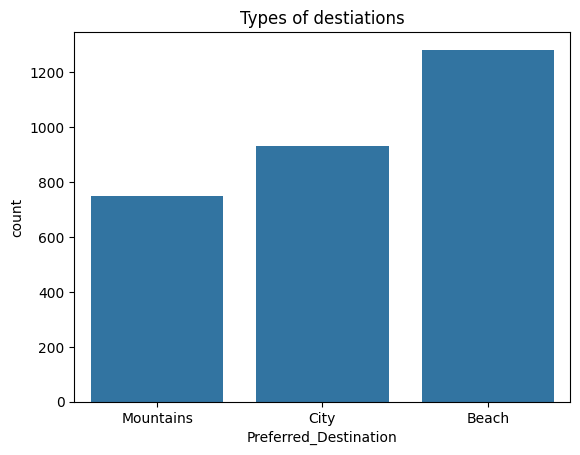

In [11]:
sns.countplot(data=data,x='Preferred_Destination')
plt.title('Types of destiations')
plt.show()

Heare we see that beach is higest preffered destination and mountains are the less preffered destination

<ipython-input-12-5e7913bdefb5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Average_Travel_Budget'],kde=True,color='green')


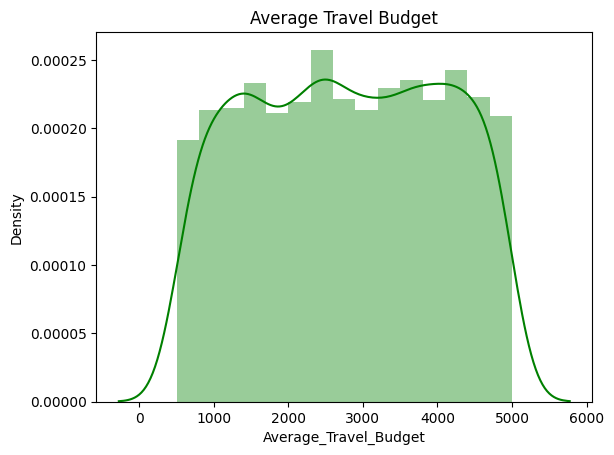

In [12]:
sns.distplot(data['Average_Travel_Budget'],kde=True,color='green')
plt.title('Average Travel Budget')
plt.show()

the average trevel budget range is from 500-5000

<ipython-input-13-781984f5ac8e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Frequency_of_Travel'])


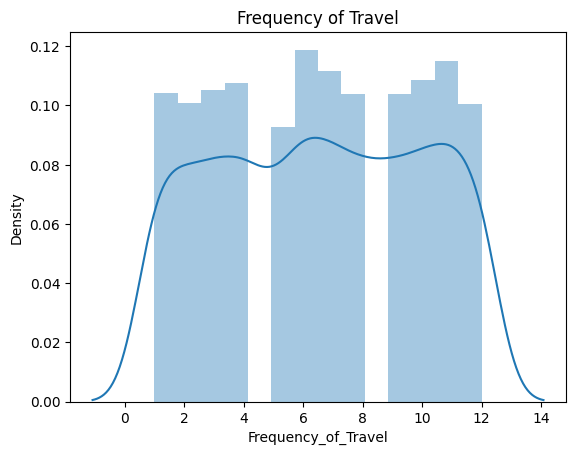

In [13]:
sns.distplot(data['Frequency_of_Travel'])
plt.title('Frequency of Travel')
plt.show()

annual travel trips are ranging from 1 trip to 12 trips

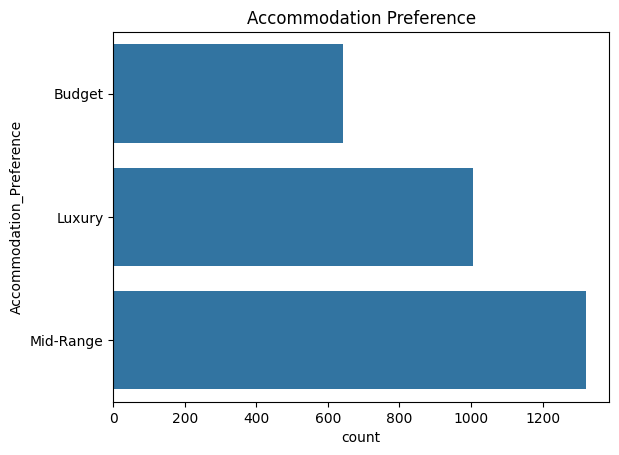

In [14]:
sns.countplot(data['Accommodation_Preference'])
plt.title('Accommodation Preference')
plt.show()

there are mid-range accomodation preffered people are high in our dataset

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
#handling the categorical data
data['Preferred_Destination']=le.fit_transform(data['Preferred_Destination'])
data['Accommodation_Preference']=le.fit_transform(data['Accommodation_Preference'])

In [18]:
data.head()

,Preferred_Destination,Average_Travel_Budget,Frequency_of_Travel,Accommodation_Preference
0,2,1360,2,0
1,1,4272,12,1
2,1,3592,12,1
3,0,966,7,0
4,0,4926,12,1


In [19]:
# feature scaling
from sklearn.preprocessing import StandardScaler
data[['Average_Travel_Budget','Frequency_of_Travel']]=StandardScaler().fit_transform(data[['Average_Travel_Budget','Frequency_of_Travel']])

In [20]:
data.head()

,Preferred_Destination,Average_Travel_Budget,Frequency_of_Travel,Accommodation_Preference
0,2,-1.108182,-1.324073,0
1,1,1.167708,1.588848,1
2,1,0.636250,1.588848,1
3,0,-1.416115,0.132388,0
4,0,1.678846,1.588848,1


# model creation

In [21]:
from sklearn.cluster import KMeans

In [22]:
# will select optimal clusters
sse=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=42)
  km.fit_transform(data)
  sse.append(km.inertia_)


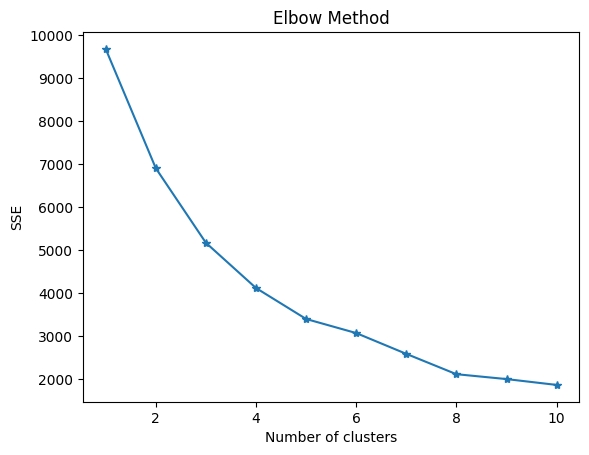

In [23]:
# plotting the elbow methos
plt.plot(range(1,11),sse,marker='*')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

here we if we take the 5 clusters based on the elbow methos

In [24]:
# let us make 5 clusters
km=KMeans(n_clusters=5,random_state=42)
data['cluster']=km.fit_predict(data)

In [25]:
data.head()

,Preferred_Destination,Average_Travel_Budget,Frequency_of_Travel,Accommodation_Preference,cluster
0,2,-1.108182,-1.324073,0,1
1,1,1.167708,1.588848,1,0
2,1,0.636250,1.588848,1,0
3,0,-1.416115,0.132388,0,1
4,0,1.678846,1.588848,1,0


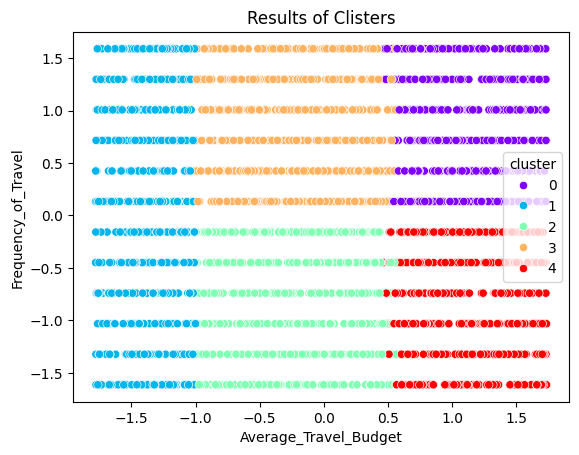

In [26]:
# plot the clusters
sns.scatterplot(data=data,x='Average_Travel_Budget',y='Frequency_of_Travel',hue='cluster',palette='rainbow')
plt.title('Results of Clisters')
plt.show()

In [27]:
# Analyze characteristics of each cluster
for cluster in range(5):
    print(f"Cluster {cluster}:")
    print(data[data['cluster'] == cluster].describe().T)


Cluster 0:
                          count      mean       std       min       25%  \
Preferred_Destination     554.0  0.453069  0.498242  0.000000  0.000000   
Average_Travel_Budget     554.0  1.121417  0.347230  0.479158  0.824019   
Frequency_of_Travel       554.0  0.857463  0.505965  0.132388  0.423680   
Accommodation_Preference  554.0  1.030686  0.172621  1.000000  1.000000   
cluster                   554.0  0.000000  0.000000  0.000000  0.000000   

                               50%       75%       max  
Preferred_Destination     0.000000  1.000000  1.000000  
Average_Travel_Budget     1.126286  1.434414  1.733555  
Frequency_of_Travel       1.006264  1.297556  1.588848  
Accommodation_Preference  1.000000  1.000000  2.000000  
cluster                   0.000000  0.000000  0.000000  
Cluster 1:
                          count      mean       std       min       25%  \
Preferred_Destination     641.0  0.951638  0.999610  0.000000  0.000000   
Average_Travel_Budget     641.0 -1.

In [29]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data.drop('cluster', axis=1), data['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.33


Silhouette Score of 0.33 is not a good score or it can indicate that clusters are not seperated well. let us optimse the k value

In [30]:
# let us make 4 clusters
km=KMeans(n_clusters=4,random_state=42)
data['cluster']=km.fit_predict(data)

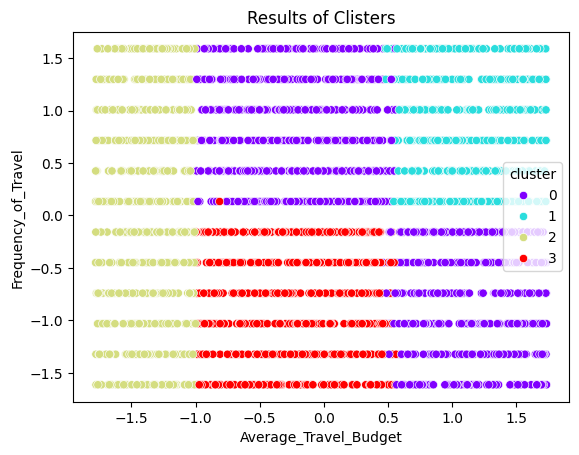

In [31]:
# plot the clusters
sns.scatterplot(data=data,x='Average_Travel_Budget',y='Frequency_of_Travel',hue='cluster',palette='rainbow')
plt.title('Results of Clisters')
plt.show()

In [33]:
sil_score = silhouette_score(data.drop('cluster', axis=1), data['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.23


ohh this also did not work well

In [34]:
# let us make 6 clusters
km=KMeans(n_clusters=6,random_state=42)
data['cluster']=km.fit_predict(data)

In [35]:
sil_score = silhouette_score(data.drop('cluster', axis=1), data['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.37


In [36]:
# let us make 8 clusters
km=KMeans(n_clusters=8,random_state=42)
data['cluster']=km.fit_predict(data)

In [37]:
sil_score = silhouette_score(data.drop('cluster', axis=1), data['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.36


In [38]:
# let us make 7 clusters
km=KMeans(n_clusters=7,random_state=42)
data['cluster']=km.fit_predict(data)

In [39]:
sil_score = silhouette_score(data.drop('cluster', axis=1), data['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.31


In [40]:
# let us make 3 clusters
km=KMeans(n_clusters=3,random_state=42)
data['cluster']=km.fit_predict(data)

In [41]:
sil_score = silhouette_score(data.drop('cluster', axis=1), data['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.21


In [42]:
# let us make 2 clusters
km=KMeans(n_clusters=2,random_state=42)
data['cluster']=km.fit_predict(data)

In [43]:
sil_score = silhouette_score(data.drop('cluster', axis=1), data['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.19


the highest Silhouette Score we got is 0.37 when we make 6 clusters....